# Mean and Median

The mean, or average, is the most commonly used measure o


### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [94]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

## The Mean

The mean is obtained by adding up all the data values ($x_1, x_2..... x_n$) and dividing by the number of datapoints $n$:


$$ \bar{x} = \frac{\sum{x_i}}{n} $$

### Toy example: mean

To understand the properties of the mean, let's start with a <i>toy example</i>, i.e. a very small dataset in which it is easy to see what is going on.

Let's say these are the heights (cm) and weights (kg) of 6 toddlers:

In [95]:
data = {'Name': ["Axel","Benji","Charlie","Danny","Edward","Freddie"],
        'Height': [89.0, 96.2, 93.4, 88.1, 91.7, 93.2],
        'Weight': [12.4, 13.8, 13.1, 12.9, 13.5, 14.0],}

toddlerData = pandas.DataFrame(data)
display(toddlerData)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,96.2,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5
5,Freddie,93.2,14.0


Eyeball the heights and have a guess what the mean height would be.

Somewhere in the low 90s...?

Let's use the method <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html"><tt>mean</tt></a> from <tt>pandas</tt> to obtain the mean of the column <tt>Height</tt>

In [29]:
toddlerData['Height'].mean()

91.93333333333334

Shall we check we get the same if we impelement the formula ourselves (add up all the data points and divide by $n$)?

In [30]:
toddlerData['Height'].sum() # add up all the heights

551.6

In [31]:
toddlerData['Height'].count() # get n

6

In [23]:
# your code to divide the sum of heights by n

91.93333333333334

Hopefully you got the same answer as using the method <tt>mean</tt>

## Median

The median is the middle value of the dataset

To obtain the median:
    <ul> 
    <li> Sort the values to obtain a list $x_1, x_2, x_3 .... x_n$
    <li> Count the values to obtain $n$
    <li> If $n$ is odd, then the median is the middle value 
    <li> If $n$ is even, the median is halfway between the middle two values
    </ul>
    
### Toy example: median

Let's get the median for our toddler height data using the method <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html"><tt>median</tt></a> from <tt>pandas</tt> 

In [98]:
toddlerData['Height'].median()

92.45

And let's check it matches the middle value in the sorted dataframe

In [96]:
display(toddlerData.sort_values(by='Height'))

,Name,Height,Weight
3,Danny,88.1,12.9
0,Axel,89.0,12.4
4,Edward,91.7,13.5
5,Freddie,93.2,14.0
2,Charlie,93.4,13.1
1,Benji,96.2,13.8


OK we need to get the halfway point between the middle two values:

In [97]:
(91.7+93.2)/2

92.45

Hurrah!

## Effect of outliers

What if someone made a data entry error?

In [103]:
data = {'Name': ["Axel","Benji","Charlie","Danny","Edward","Freddie"],
        'Height': [89.0, 962, 93.4, 88.1, 91.7, 93.2],
        'Weight': [12.4, 13.8, 13.1, 12.9, 13.5, 14.0]}

toddlerData_outlier = pandas.DataFrame(data)
display(toddlerData_outlier)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,962.0,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5
5,Freddie,93.2,14.0


<ul> <li> What error can you see in the dataframe above?</li></ul>

Let's calculate the mean again:

In [104]:
toddlerData_outlier['Height'].mean()

236.23333333333335

Hm, that's not a very plausible value for the average height of a toddler.

The mean is quite vulnerable to outliers, especially extreme outliers. This kind of outlier (where one data value is 10x larger than it should be) tends to arise from data entry errors. 

What about the median?

In [105]:
toddlerData_outlier['Height'].median()

92.45

The median is completely unaffected by the outlier, as the middle two values stayed the same.

The median is sometimes said to be <i>robust to outliers</i> for this reason.

It is good practice to always plot your raw data, before you do anything else, so that you notice if there is an extreme outlier lurking in there.

Luckily with the computer, plotting the data takes little effort (don't worry about the plotting code at the stage as there is a whole session on plotting later on).

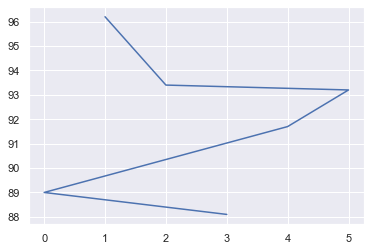

In [110]:
# sort the data


plt.plot(toddlerData.sort_values(by='Height')['Height'])

### Correct the outlier

Once you have noticed an outlier, you have a couple of options. 

If you can go back and check what the correct value should have been (eg the error is from someone transcribing handwritten data), you can correct it:

In [70]:
toddlerData.loc[(toddlerData['Name']=='Freddie'),['Height']]=93.2
display(toddlerData)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,96.2,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5
5,Freddie,93.2,14.0


### Delete the outlier

If you don't know the correct value, you could delete the entire entry:

In [80]:
toddlerData_clean = toddlerData.drop(5) # 5 is the index for Freddie
display(toddlerData_clean)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,96.2,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5


We dropped row 5, as 5 is the row index for Freddie (I know this by looking at the dataframe above)

If we can't easily find the row index by looking, we can use the <tt>pandas</tt> function <tt>index</tt> to get the row number(s)

In [86]:
ix = toddlerData.index[toddlerData['Name']=='Freddie']

toddlerData_clean = toddlerData.drop(5) # 5 is the index for Freddie
display(toddlerData_clean)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,96.2,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5


### Replace the outlier with <tt>NaN</tt>

<tt>NaN</tt> stands for not a number and is a filler for missing values in many programming languages.

We could replace Freddie's incorrectly recorded height with a <tt>NaN</tt> rather than deleting the whole row.



In [93]:
toddlerData_clean = toddlerData # work on a copy of the raw dataframe

toddlerData_clean.loc[(toddlerData['Name']=='Freddie'),['Height']]=np.NaN
display(toddlerData)

,Name,Height,Weight
0,Axel,89.0,12.4
1,Benji,96.2,13.8
2,Charlie,93.4,13.1
3,Danny,88.1,12.9
4,Edward,91.7,13.5
5,Freddie,NaN,14.0


This has two advantages:
    <ol>
    <li> We retain other data for Freddie, such as his weight, that could still be useful
    <li> We are not hiding the fact that we misrecorded a data point. 
        <ol>
To elaobrate on point 2 above - if we delete the row, no-one will know Freddie was ever in the study, whereas with <tt>NaN</tt> we can see he was measured but there was some missing data. 
            
This is a more open approach as readers can see where data were lost. In the toy example, it's not really important, but imagine (say) you were collecting blood samples from patients every 6 months to follow up some treatment, and patients gradually drop out of the study because it's too much hassle. If you deleted everyone who dropped out, you would be hiding an important bias in your data (only retained people who were willing to complete the entire study - are they even typical examples?)

In [89]:
toddlerData['Height'].mean()

91.68